<a href="https://colab.research.google.com/github/dtoralg/INESDI_Data-Science_ML_IA/blob/main/%5B06%5D%20-%20Deep%20Learning/MLP_Basico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MLP basico — Fashion-MNIST (end‑to‑end)

Este notebook entrena un **MLP (red neuronal densa)** sobre **Fashion‑MNIST** usando TensorFlow/Keras.
- Dataset **online y fijo** (se descarga automáticamente la primera vez).
- Código **paso a paso**, sencillo y con buenas prácticas mínimas.
- Incluye **EarlyStopping**, **conjunto de validación estratificado**, **curvas de entrenamiento** y **predicciones de ejemplo**.

> Si te faltan dependencias: `pip install tensorflow scikit-learn matplotlib`


In [ ]:
# (Opcional) Instalar dependencias si faltan — ejecuta manualmente si es necesario
!pip install tensorflow scikit-learn matplotlib

In [ ]:
# 1) Importaciones
import os
import random
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split


In [ ]:
# 2) Reproducibilidad
def set_global_seed(seed: int = 42):
    """Fija semillas para intentar resultados reproducibles."""
    os.environ["PYTHONHASHSEED"] = str(seed)
    try:
        tf.config.experimental.enable_op_determinism(True)
    except Exception:
        pass
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

set_global_seed(42)
print("Semilla global fijada en 42.")


Semilla global fijada en 42.


In [ ]:
# 3) Carga y preparación de datos (Fashion-MNIST)
from tensorflow.keras.datasets import fashion_mnist

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

# Normalizar a [0,1]
X_train_full = X_train_full.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# Aplanar 28x28 -> 784 (para MLP)
X_train_full = X_train_full.reshape((X_train_full.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

# Split estratificado: train -> train + val
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full
)

input_dim = X_train.shape[1]
num_classes = 10
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

print("Tamaño train:", X_train.shape, "\tTamaño val:", X_val.shape, "\tTamaño test:", X_test.shape)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Tamaño train: (48000, 784) 	Tamaño val: (12000, 784) 	Tamaño test: (10000, 784)


In [ ]:
# 4) Construcción del MLP
def build_mlp(input_dim: int, num_classes: int = 10) -> keras.Model:
    model = keras.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.2),
        layers.Dense(64, activation="relu"),
        layers.Dense(num_classes, activation="softmax")
    ])
    return model

model = build_mlp(input_dim=input_dim, num_classes=num_classes)
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 5) Entrenamiento con EarlyStopping
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

early_stop = keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=3, restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=128,
    callbacks=[early_stop],
    verbose=1
)
print("Entrenamiento finalizado.")


Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6878 - loss: 0.8937 - val_accuracy: 0.8484 - val_loss: 0.4254
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8365 - loss: 0.4550 - val_accuracy: 0.8676 - val_loss: 0.3685
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8558 - loss: 0.4018 - val_accuracy: 0.8733 - val_loss: 0.3502
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8653 - loss: 0.3712 - val_accuracy: 0.8792 - val_loss: 0.3366
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8709 - loss: 0.3511 - val_accuracy: 0.8799 - val_loss: 0.3317
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8751 - loss: 0.3378 - val_accuracy: 0.8845 - val_loss: 0.3281
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8819 - loss: 0.3190 - val_accuracy: 0.8801 - val_loss: 0.3283
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8826 - loss: 0.3157 - val_accuracy: 0.

In [ ]:
# 6) Evaluación en test + reporte
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Loss (test): {loss:.4f}")
print(f"Accuracy (test): {acc:.4f}")

y_pred_probs = model.predict(X_test, verbose=0)
y_pred = np.argmax(y_pred_probs, axis=1)

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, digits=4))

cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión (valores absolutos):\n", cm)


Loss (test): 0.3557
Accuracy (test): 0.8737

Reporte de clasificación:
              precision    recall  f1-score   support

           0     0.8299    0.8150    0.8224      1000
           1     0.9908    0.9700    0.9803      1000
           2     0.7814    0.7830    0.7822      1000
           3     0.8521    0.8930    0.8721      1000
           4     0.7190    0.8520    0.7799      1000
           5     0.9736    0.9590    0.9662      1000
           6     0.7487    0.5870    0.6581      1000
           7     0.9110    0.9730    0.9410      1000
           8     0.9622    0.9670    0.9646      1000
           9     0.9751    0.9380    0.9562      1000

    accuracy                         0.8737     10000
   macro avg     0.8744    0.8737    0.8723     10000
weighted avg     0.8744    0.8737    0.8723     10000

Matriz de confusión (valores absolutos):
 [[815   1  16  59   4   2  92   0  11   0]
 [  1 970   1  21   4   0   1   0   2   0]
 [ 13   0 783  10 153   1  39   1   0   0]

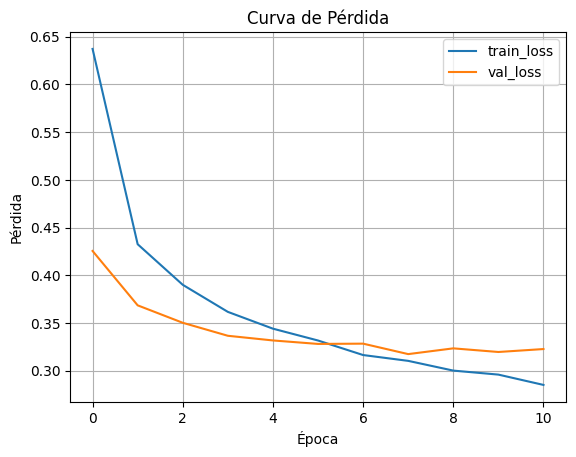

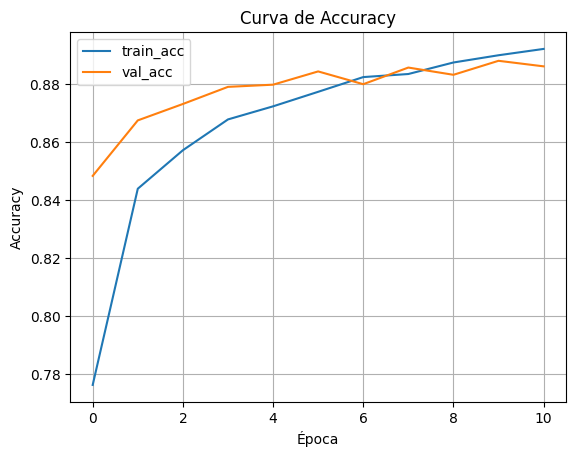

In [ ]:
# 7) Curvas de aprendizaje (pérdida y accuracy)
hist = history.history

plt.figure()
plt.plot(hist["loss"], label="train_loss")
plt.plot(hist["val_loss"], label="val_loss")
plt.xlabel("Época"); plt.ylabel("Pérdida"); plt.title("Curva de Pérdida"); plt.legend(); plt.grid(True)
plt.show()

plt.figure()
plt.plot(hist["accuracy"], label="train_acc")
plt.plot(hist["val_accuracy"], label="val_acc")
plt.xlabel("Época"); plt.ylabel("Accuracy"); plt.title("Curva de Accuracy"); plt.legend(); plt.grid(True)
plt.show()


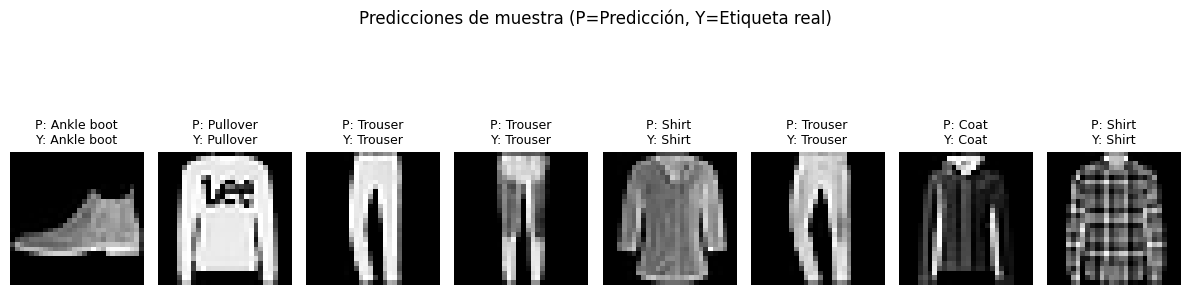

In [ ]:
# 8) Predicciones de muestra
num_samples = 8
idx = np.arange(0, num_samples)
X_subset = X_test[idx]
y_subset = y_test[idx]

y_probs = model.predict(X_subset, verbose=0)
y_pred = np.argmax(y_probs, axis=1)

images = X_subset.reshape((-1, 28, 28))

plt.figure(figsize=(12, 4))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(images[i], cmap="gray")
    title = f"P: {class_names[y_pred[i]]}\nY: {class_names[y_subset[i]]}"
    plt.title(title, fontsize=9)
    plt.axis("off")
plt.suptitle("Predicciones de muestra (P=Predicción, Y=Etiqueta real)")
plt.tight_layout()
plt.show()
